In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures




In [3]:
torch.manual_seed(42)

def generate_xor_data(n_samples):
    X = np.random.rand(n_samples, 2) * 2 - 1  
    y = (X[:, 0] * X[:, 1] > 0).astype(int)  
    return X, y

# Create the dataset
X, y = generate_xor_data(400)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [6]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


def calculate_accuracy(model, X, y):
    model.eval()  
    with torch.no_grad():
        output = model(X)
        predicted = (output >= 0.5).float() 
        accuracy = (predicted == y).sum().item() / y.size(0)
    return accuracy

def train_model(model, X_train, y_train, X_test, y_test, reg_type=None, reg_coeff=0.0, epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()  
        optimizer.zero_grad()

        output = model(X_train)
        loss = criterion(output, y_train)
        
        if reg_type == 'L1':
            l1_reg = reg_coeff * sum(p.abs().sum() for p in model.parameters())
            loss += l1_reg
        elif reg_type == 'L2':
            l2_reg = reg_coeff * sum(p.pow(2).sum() for p in model.parameters())
            loss += l2_reg

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            train_acc = calculate_accuracy(model, X_train, y_train)
            test_acc = calculate_accuracy(model, X_test, y_test)
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    final_train_acc = calculate_accuracy(model, X_train, y_train)
    final_test_acc = calculate_accuracy(model, X_test, y_test)
    print(f'Final Train Accuracy: {final_train_acc:.4f}, Final Test Accuracy: {final_test_acc:.4f}')
    
    return model

In [8]:
mlp = MLP(2, 10, 1)
train_model(mlp, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor)

Epoch [0/1000], Loss: 0.6936, Train Acc: 0.4950, Test Acc: 0.5100
Epoch [100/1000], Loss: 0.0875, Train Acc: 0.9900, Test Acc: 0.9900
Epoch [200/1000], Loss: 0.0345, Train Acc: 1.0000, Test Acc: 0.9850
Epoch [300/1000], Loss: 0.0189, Train Acc: 1.0000, Test Acc: 0.9800
Epoch [400/1000], Loss: 0.0112, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [500/1000], Loss: 0.0075, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [600/1000], Loss: 0.0053, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [700/1000], Loss: 0.0039, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [800/1000], Loss: 0.0029, Train Acc: 1.0000, Test Acc: 0.9750
Epoch [900/1000], Loss: 0.0022, Train Acc: 1.0000, Test Acc: 0.9750
Final Train Accuracy: 1.0000, Final Test Accuracy: 0.9750


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [9]:
mlp_l1 = MLP(2, 10, 1)
train_model(mlp_l1, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor, reg_type='L1', reg_coeff=0.01)

Epoch [0/1000], Loss: 1.0190, Train Acc: 0.4950, Test Acc: 0.5100
Epoch [100/1000], Loss: 0.6445, Train Acc: 0.6650, Test Acc: 0.6650
Epoch [200/1000], Loss: 0.6320, Train Acc: 0.6800, Test Acc: 0.6850
Epoch [300/1000], Loss: 0.6292, Train Acc: 0.6850, Test Acc: 0.6850
Epoch [400/1000], Loss: 0.6289, Train Acc: 0.6850, Test Acc: 0.6850
Epoch [500/1000], Loss: 0.6288, Train Acc: 0.6850, Test Acc: 0.6850
Epoch [600/1000], Loss: 0.6286, Train Acc: 0.6850, Test Acc: 0.6900
Epoch [700/1000], Loss: 0.6289, Train Acc: 0.6850, Test Acc: 0.6850
Epoch [800/1000], Loss: 0.6287, Train Acc: 0.6900, Test Acc: 0.6900
Epoch [900/1000], Loss: 0.6287, Train Acc: 0.6850, Test Acc: 0.6850
Final Train Accuracy: 0.6850, Final Test Accuracy: 0.6850


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [10]:
mlp_l2 = MLP(2, 10, 1)
train_model(mlp_l2, X_train_tensor, y_train_tensor,X_test_tensor, y_test_tensor, reg_type='L2', reg_coeff=0.01)

Epoch [0/1000], Loss: 0.7835, Train Acc: 0.4950, Test Acc: 0.5100
Epoch [100/1000], Loss: 0.4336, Train Acc: 0.9750, Test Acc: 0.9850
Epoch [200/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9900
Epoch [300/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9900
Epoch [400/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9900
Epoch [500/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9850
Epoch [600/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9850
Epoch [700/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9850
Epoch [800/1000], Loss: 0.4299, Train Acc: 0.9800, Test Acc: 0.9900
Epoch [900/1000], Loss: 0.4299, Train Acc: 0.9750, Test Acc: 0.9850
Final Train Accuracy: 0.9800, Final Test Accuracy: 0.9900


MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [12]:
class LogisticRegressionPoly(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPoly, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = torch.tensor(poly.fit_transform(X_train), dtype=torch.float32)
X_test_poly = torch.tensor(poly.transform(X_test), dtype=torch.float32)

log_reg_poly = LogisticRegressionPoly(X_train_poly.shape[1])

train_model(log_reg_poly, X_train_poly, y_train_tensor, X_test_poly, y_test_tensor, epochs=1000, lr=0.1)


Epoch [0/1000], Loss: 0.6624, Train Acc: 0.6550, Test Acc: 0.6550
Epoch [100/1000], Loss: 0.2787, Train Acc: 0.9450, Test Acc: 0.9500
Epoch [200/1000], Loss: 0.2146, Train Acc: 0.9600, Test Acc: 0.9600
Epoch [300/1000], Loss: 0.1840, Train Acc: 0.9700, Test Acc: 0.9650
Epoch [400/1000], Loss: 0.1649, Train Acc: 0.9700, Test Acc: 0.9650
Epoch [500/1000], Loss: 0.1514, Train Acc: 0.9700, Test Acc: 0.9650
Epoch [600/1000], Loss: 0.1410, Train Acc: 0.9800, Test Acc: 0.9700
Epoch [700/1000], Loss: 0.1327, Train Acc: 0.9800, Test Acc: 0.9750
Epoch [800/1000], Loss: 0.1258, Train Acc: 0.9800, Test Acc: 0.9850
Epoch [900/1000], Loss: 0.1199, Train Acc: 0.9800, Test Acc: 0.9850
Final Train Accuracy: 0.9800, Final Test Accuracy: 0.9850


LogisticRegressionPoly(
  (linear): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

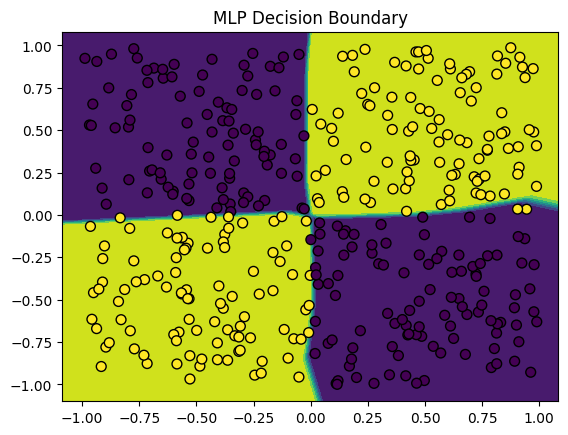

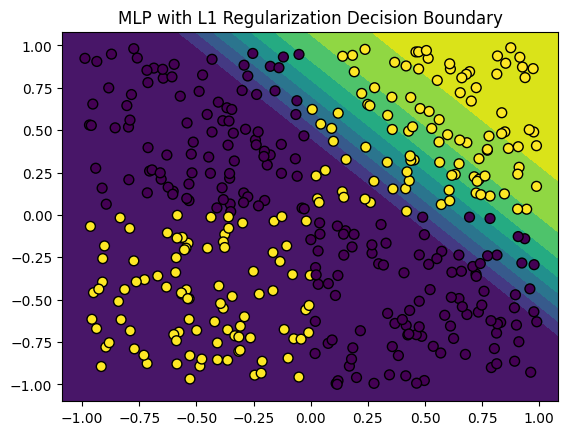

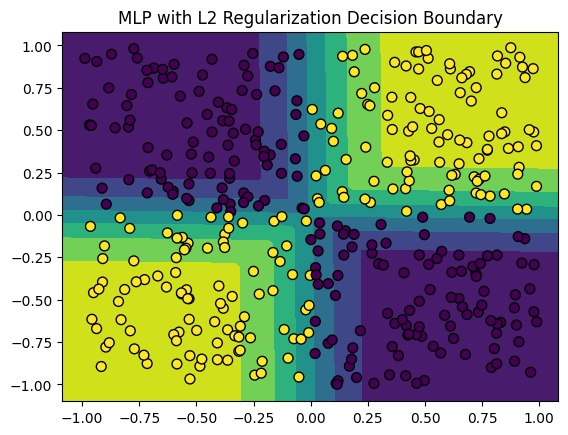

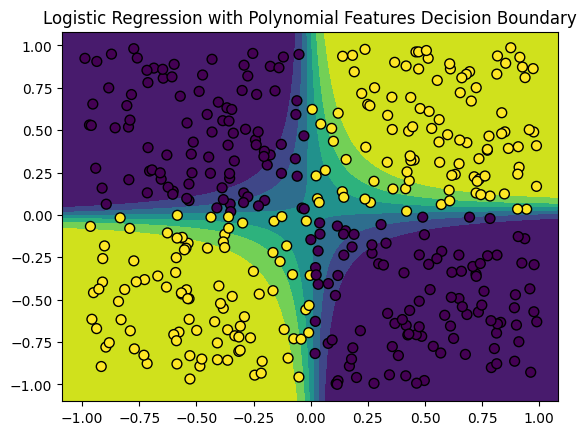

In [17]:
def plot_decision_boundary(model, X, y, title, poly_features=False):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if poly_features:
        grid_poly = torch.tensor(poly.transform(grid), dtype=torch.float32)
        Z = model(grid_poly).detach().numpy()
    else:
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        Z = model(grid_tensor).detach().numpy()
        
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',s=50)
    plt.title(title)
    plt.show()

plot_decision_boundary(mlp, X, y, "MLP Decision Boundary")
plot_decision_boundary(mlp_l1, X, y, "MLP with L1 Regularization Decision Boundary")
plot_decision_boundary(mlp_l2, X, y, "MLP with L2 Regularization Decision Boundary")
plot_decision_boundary(log_reg_poly, X, y, "Logistic Regression with Polynomial Features Decision Boundary", poly_features=True)
